In [1]:
from google.colab import files
uploaded=files.upload()

Saving Dataset .csv to Dataset .csv


In [3]:
import pandas as pd
df=pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Task -1 Restaurant Rating

<Axes: ylabel='Frequency'>

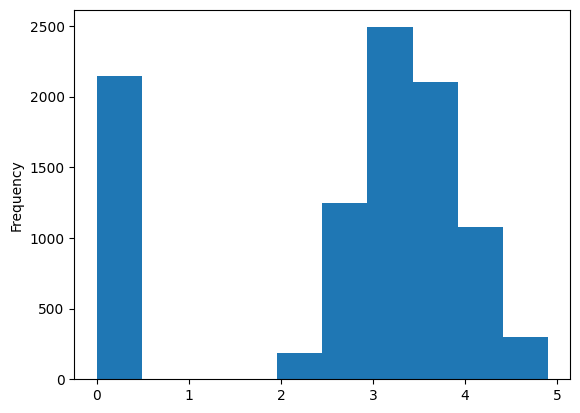

In [4]:
df['Aggregate rating'].plot(kind='hist')


In [5]:
print("\nMost common rating range:\n", df['Rating text'].value_counts().head())

print("\nAverage votes:", df['Votes'].mean())



Most common rating range:
 Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Name: count, dtype: int64

Average votes: 156.909747670401


Task-2 Cuisine Combination

In [6]:
print("\nMost common cuisine combinations:\n", df['Cuisines'].value_counts().head(5))

df['Cuisine_Count'] = df['Cuisines'].apply(lambda x: len(str(x).split(',')))
print("\nCuisine count vs avg rating:\n", df.groupby('Cuisine_Count')['Aggregate rating'].mean())



Most common cuisine combinations:
 Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64

Cuisine count vs avg rating:
 Cuisine_Count
1    2.234999
2    2.693293
3    3.039239
4    3.415582
5    3.510366
6    3.672973
7    3.671429
8    3.421429
Name: Aggregate rating, dtype: float64


Task-3 Geographic Analysis

<Axes: xlabel='Longitude', ylabel='Latitude'>

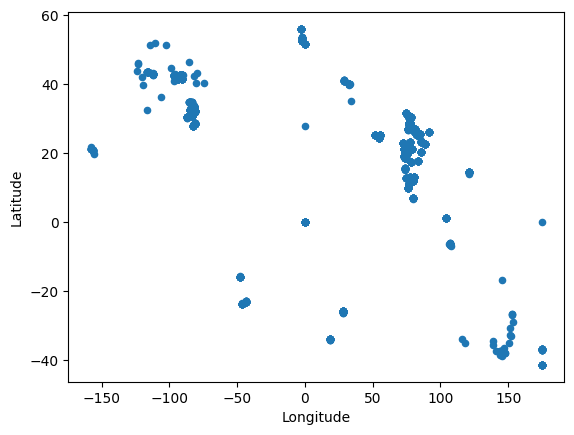

In [7]:
df.plot(kind='scatter', x='Longitude', y='Latitude')


Task-4 Restaurant Chains

In [8]:
chains = df['Restaurant Name'].value_counts()
chain_list = chains[chains > 1]
print("\nRestaurant Chains:\n", chain_list.head())

chain_data = df[df['Restaurant Name'].isin(chain_list.index)]
print("\nChain performance:\n", chain_data.groupby('Restaurant Name')[['Aggregate rating','Votes']].mean().sort_values(by='Votes', ascending=False).head())



Restaurant Chains:
 Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: count, dtype: int64

Chain performance:
                            Aggregate rating        Votes
Restaurant Name                                         
Truffles                           3.950000  4841.000000
Joey's Pizza                       4.250000  3903.500000
AB's - Absolute Barbecues          4.825000  3350.000000
Big Chill                          4.475000  2713.250000
Big Yellow Door                    4.266667  2503.666667
